In [1]:
%matplotlib notebook

In [2]:
from pydgrid import grid
from pydgrid.plot_bokeh import plot_results
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pydgrid'

# PYDGRID: simulación de la instalación fotovoltaica

In [3]:
p_gen = 1000.0  # kW
q_gen = 0       # kvar

p_statcom = 0.0  # kW
q_statcom = 0.0     # kvar

data = {
    "lines":[
        {"bus_j": "POImv",  "bus_k": "TR_1_2_mv",   "code": "mv_cu_300", "m":196.34},
        {"bus_j": "TR_1_2_mv",  "bus_k": "TR_3_4_mv",   "code": "mv_cu_300", "m":169.11},
        {"bus_j": "TR_3_4_mv",  "bus_k": "TR_7_8_mv",  "code": "mv_cu_150", "m":155.24},
        {"bus_j": "TR_7_8_mv",  "bus_k": "TR_13_mv",  "code": "mv_cu_150", "m":353.76},
        #{"bus_j": "TR_13_mv",  "bus_k": "TR_11_12_mv",  "code": "mv_cu_95", "m":450.38},
        {"bus_j": "TR_11_12_mv",  "bus_k": "TR_9_10_mv",  "code": "mv_cu_150", "m":263.56},
        {"bus_j": "TR_9_10_mv",  "bus_k": "TR_5_6_mv",  "code": "mv_cu_300", "m":107.57},
        {"bus_j": "TR_5_6_mv",  "bus_k": "POImv",  "code": "mv_cu_300", "m":554.1},
        {"bus_j": "INV_1",  "bus_k": "TR_1_2_lv",  "code": "lv_cu_95", "m":183.83},
        {"bus_j": "INV_1",  "bus_k": "TR_1_2_lv",  "code": "lv_cu_95", "m":183.83},
        {"bus_j": "INV_1",  "bus_k": "TR_1_2_lv",  "code": "lv_cu_95", "m":183.83},
        {"bus_j": "INV_1",  "bus_k": "TR_1_2_lv",  "code": "lv_cu_95", "m":183.83},        
        {"bus_j": "INV_1",  "bus_k": "TR_1_2_lv",  "code": "lv_cu_95", "m":183.83},
        {"bus_j": "INV_1",  "bus_k": "TR_1_2_lv",  "code": "lv_cu_95", "m":183.83},
        {"bus_j": "INV_1",  "bus_k": "TR_1_2_lv",  "code": "lv_cu_95", "m":183.83},
        {"bus_j": "INV_1",  "bus_k": "TR_1_2_lv",  "code": "lv_cu_95", "m":183.83},
        {"bus_j": "INV_1",  "bus_k": "TR_1_2_lv",  "code": "lv_cu_95", "m":183.83},        
        {"bus_j": "INV_1",  "bus_k": "TR_1_2_lv",  "code": "lv_cu_95", "m":183.83},
        {"bus_j": "INV_2",  "bus_k": "TR_1_2_lv",  "code": "lv_cu_95", "m":168.24},
        {"bus_j": "INV_2",  "bus_k": "TR_1_2_lv",  "code": "lv_cu_95", "m":168.24},
        {"bus_j": "INV_2",  "bus_k": "TR_1_2_lv",  "code": "lv_cu_95", "m":168.24},
        {"bus_j": "INV_2",  "bus_k": "TR_1_2_lv",  "code": "lv_cu_95", "m":168.24},
        {"bus_j": "INV_2",  "bus_k": "TR_1_2_lv",  "code": "lv_cu_95", "m":168.24},
        {"bus_j": "INV_2",  "bus_k": "TR_1_2_lv",  "code": "lv_cu_95", "m":168.24},
        {"bus_j": "INV_2",  "bus_k": "TR_1_2_lv",  "code": "lv_cu_95", "m":168.24},
        {"bus_j": "INV_2",  "bus_k": "TR_1_2_lv",  "code": "lv_cu_95", "m":168.24},
        {"bus_j": "INV_2",  "bus_k": "TR_1_2_lv",  "code": "lv_cu_95", "m":168.24},
        {"bus_j": "INV_2",  "bus_k": "TR_1_2_lv",  "code": "lv_cu_95", "m":168.24},
        {"bus_j": "INV_3",  "bus_k": "TR_3_4_lv",  "code": "lv_cu_95", "m":152.76},
        {"bus_j": "INV_3",  "bus_k": "TR_3_4_lv",  "code": "lv_cu_95", "m":152.76},
        {"bus_j": "INV_3",  "bus_k": "TR_3_4_lv",  "code": "lv_cu_95", "m":152.76},
        {"bus_j": "INV_3",  "bus_k": "TR_3_4_lv",  "code": "lv_cu_95", "m":152.76},
        {"bus_j": "INV_3",  "bus_k": "TR_3_4_lv",  "code": "lv_cu_95", "m":152.76},
        {"bus_j": "INV_3",  "bus_k": "TR_3_4_lv",  "code": "lv_cu_95", "m":152.76},
        {"bus_j": "INV_3",  "bus_k": "TR_3_4_lv",  "code": "lv_cu_95", "m":152.76},
        {"bus_j": "INV_3",  "bus_k": "TR_3_4_lv",  "code": "lv_cu_95", "m":152.76},
        {"bus_j": "INV_3",  "bus_k": "TR_3_4_lv",  "code": "lv_cu_95", "m":152.76},
        {"bus_j": "INV_3",  "bus_k": "TR_3_4_lv",  "code": "lv_cu_95", "m":152.76},
        {"bus_j": "INV_4",  "bus_k": "TR_3_4_lv",  "code": "lv_cu_95", "m":281.61},
        {"bus_j": "INV_4",  "bus_k": "TR_3_4_lv",  "code": "lv_cu_95", "m":281.61},
        {"bus_j": "INV_4",  "bus_k": "TR_3_4_lv",  "code": "lv_cu_95", "m":281.61},
        {"bus_j": "INV_4",  "bus_k": "TR_3_4_lv",  "code": "lv_cu_95", "m":281.61},        
        {"bus_j": "INV_4",  "bus_k": "TR_3_4_lv",  "code": "lv_cu_95", "m":281.61},
        {"bus_j": "INV_4",  "bus_k": "TR_3_4_lv",  "code": "lv_cu_95", "m":281.61},
        {"bus_j": "INV_4",  "bus_k": "TR_3_4_lv",  "code": "lv_cu_95", "m":281.61},
        {"bus_j": "INV_4",  "bus_k": "TR_3_4_lv",  "code": "lv_cu_95", "m":281.61},
        {"bus_j": "INV_4",  "bus_k": "TR_3_4_lv",  "code": "lv_cu_95", "m":281.61},        
        {"bus_j": "INV_4",  "bus_k": "TR_3_4_lv",  "code": "lv_cu_95", "m":281.61},
        {"bus_j": "INV_5",  "bus_k": "TR_5_6_lv",  "code": "lv_cu_95", "m":177.6},
        {"bus_j": "INV_5",  "bus_k": "TR_5_6_lv",  "code": "lv_cu_95", "m":177.6},
        {"bus_j": "INV_5",  "bus_k": "TR_5_6_lv",  "code": "lv_cu_95", "m":177.6},
        {"bus_j": "INV_5",  "bus_k": "TR_5_6_lv",  "code": "lv_cu_95", "m":177.6},
        {"bus_j": "INV_5",  "bus_k": "TR_5_6_lv",  "code": "lv_cu_95", "m":177.6},
        {"bus_j": "INV_5",  "bus_k": "TR_5_6_lv",  "code": "lv_cu_95", "m":177.6},
        {"bus_j": "INV_5",  "bus_k": "TR_5_6_lv",  "code": "lv_cu_95", "m":177.6},
        {"bus_j": "INV_5",  "bus_k": "TR_5_6_lv",  "code": "lv_cu_95", "m":177.6},
        {"bus_j": "INV_5",  "bus_k": "TR_5_6_lv",  "code": "lv_cu_95", "m":177.6},
        {"bus_j": "INV_5",  "bus_k": "TR_5_6_lv",  "code": "lv_cu_95", "m":177.6},
        {"bus_j": "INV_6",  "bus_k": "TR_5_6_lv",  "code": "lv_cu_95", "m":281.39},
        {"bus_j": "INV_6",  "bus_k": "TR_5_6_lv",  "code": "lv_cu_95", "m":281.39},
        {"bus_j": "INV_6",  "bus_k": "TR_5_6_lv",  "code": "lv_cu_95", "m":281.39},
        {"bus_j": "INV_6",  "bus_k": "TR_5_6_lv",  "code": "lv_cu_95", "m":281.39},
        {"bus_j": "INV_6",  "bus_k": "TR_5_6_lv",  "code": "lv_cu_95", "m":281.39},
        {"bus_j": "INV_6",  "bus_k": "TR_5_6_lv",  "code": "lv_cu_95", "m":281.39},
        {"bus_j": "INV_6",  "bus_k": "TR_5_6_lv",  "code": "lv_cu_95", "m":281.39},
        {"bus_j": "INV_6",  "bus_k": "TR_5_6_lv",  "code": "lv_cu_95", "m":281.39},
        {"bus_j": "INV_6",  "bus_k": "TR_5_6_lv",  "code": "lv_cu_95", "m":281.39},
        {"bus_j": "INV_6",  "bus_k": "TR_5_6_lv",  "code": "lv_cu_95", "m":281.39},
        {"bus_j": "INV_7",  "bus_k": "TR_7_8_lv",  "code": "lv_cu_95", "m":66.9},
        {"bus_j": "INV_7",  "bus_k": "TR_7_8_lv",  "code": "lv_cu_95", "m":66.9},
        {"bus_j": "INV_7",  "bus_k": "TR_7_8_lv",  "code": "lv_cu_95", "m":66.9},
        {"bus_j": "INV_7",  "bus_k": "TR_7_8_lv",  "code": "lv_cu_95", "m":66.9},
        {"bus_j": "INV_7",  "bus_k": "TR_7_8_lv",  "code": "lv_cu_95", "m":66.9},
        {"bus_j": "INV_7",  "bus_k": "TR_7_8_lv",  "code": "lv_cu_95", "m":66.9},
        {"bus_j": "INV_7",  "bus_k": "TR_7_8_lv",  "code": "lv_cu_95", "m":66.9},
        {"bus_j": "INV_7",  "bus_k": "TR_7_8_lv",  "code": "lv_cu_95", "m":66.9},
        {"bus_j": "INV_7",  "bus_k": "TR_7_8_lv",  "code": "lv_cu_95", "m":66.9},
        {"bus_j": "INV_7",  "bus_k": "TR_7_8_lv",  "code": "lv_cu_95", "m":66.9},
        {"bus_j": "INV_8",  "bus_k": "TR_7_8_lv",  "code": "lv_cu_95", "m":154.14},
        {"bus_j": "INV_8",  "bus_k": "TR_7_8_lv",  "code": "lv_cu_95", "m":154.14},
        {"bus_j": "INV_8",  "bus_k": "TR_7_8_lv",  "code": "lv_cu_95", "m":154.14},
        {"bus_j": "INV_8",  "bus_k": "TR_7_8_lv",  "code": "lv_cu_95", "m":154.14},
        {"bus_j": "INV_8",  "bus_k": "TR_7_8_lv",  "code": "lv_cu_95", "m":154.14},
        {"bus_j": "INV_8",  "bus_k": "TR_7_8_lv",  "code": "lv_cu_95", "m":154.14},
        {"bus_j": "INV_8",  "bus_k": "TR_7_8_lv",  "code": "lv_cu_95", "m":154.14},
        {"bus_j": "INV_8",  "bus_k": "TR_7_8_lv",  "code": "lv_cu_95", "m":154.14},
        {"bus_j": "INV_8",  "bus_k": "TR_7_8_lv",  "code": "lv_cu_95", "m":154.14},
        {"bus_j": "INV_8",  "bus_k": "TR_7_8_lv",  "code": "lv_cu_95", "m":154.14},
        {"bus_j": "INV_9",  "bus_k": "TR_9_10_lv",  "code": "lv_cu_95", "m":167.67},
        {"bus_j": "INV_9",  "bus_k": "TR_9_10_lv",  "code": "lv_cu_95", "m":167.67},
        {"bus_j": "INV_9",  "bus_k": "TR_9_10_lv",  "code": "lv_cu_95", "m":167.67},
        {"bus_j": "INV_9",  "bus_k": "TR_9_10_lv",  "code": "lv_cu_95", "m":167.67},
        {"bus_j": "INV_9",  "bus_k": "TR_9_10_lv",  "code": "lv_cu_95", "m":167.67},
        {"bus_j": "INV_9",  "bus_k": "TR_9_10_lv",  "code": "lv_cu_95", "m":167.67},
        {"bus_j": "INV_9",  "bus_k": "TR_9_10_lv",  "code": "lv_cu_95", "m":167.67},
        {"bus_j": "INV_9",  "bus_k": "TR_9_10_lv",  "code": "lv_cu_95", "m":167.67},
        {"bus_j": "INV_9",  "bus_k": "TR_9_10_lv",  "code": "lv_cu_95", "m":167.67},
        {"bus_j": "INV_9",  "bus_k": "TR_9_10_lv",  "code": "lv_cu_95", "m":167.67},
        {"bus_j": "INV_10",  "bus_k": "TR_9_10_lv",  "code": "lv_cu_95", "m":217.15},
        {"bus_j": "INV_10",  "bus_k": "TR_9_10_lv",  "code": "lv_cu_95", "m":217.15},
        {"bus_j": "INV_10",  "bus_k": "TR_9_10_lv",  "code": "lv_cu_95", "m":217.15},
        {"bus_j": "INV_10",  "bus_k": "TR_9_10_lv",  "code": "lv_cu_95", "m":217.15},
        {"bus_j": "INV_10",  "bus_k": "TR_9_10_lv",  "code": "lv_cu_95", "m":217.15},
        {"bus_j": "INV_10",  "bus_k": "TR_9_10_lv",  "code": "lv_cu_95", "m":217.15},
        {"bus_j": "INV_10",  "bus_k": "TR_9_10_lv",  "code": "lv_cu_95", "m":217.15},
        {"bus_j": "INV_10",  "bus_k": "TR_9_10_lv",  "code": "lv_cu_95", "m":217.15},
        {"bus_j": "INV_10",  "bus_k": "TR_9_10_lv",  "code": "lv_cu_95", "m":217.15},
        {"bus_j": "INV_10",  "bus_k": "TR_9_10_lv",  "code": "lv_cu_95", "m":217.15},
        {"bus_j": "INV_11",  "bus_k": "TR_11_12_lv",  "code": "lv_cu_95", "m":201.79},
        {"bus_j": "INV_11",  "bus_k": "TR_11_12_lv",  "code": "lv_cu_95", "m":201.79},
        {"bus_j": "INV_11",  "bus_k": "TR_11_12_lv",  "code": "lv_cu_95", "m":201.79},
        {"bus_j": "INV_11",  "bus_k": "TR_11_12_lv",  "code": "lv_cu_95", "m":201.79},
        {"bus_j": "INV_11",  "bus_k": "TR_11_12_lv",  "code": "lv_cu_95", "m":201.79},
        {"bus_j": "INV_11",  "bus_k": "TR_11_12_lv",  "code": "lv_cu_95", "m":201.79},
        {"bus_j": "INV_11",  "bus_k": "TR_11_12_lv",  "code": "lv_cu_95", "m":201.79},
        {"bus_j": "INV_11",  "bus_k": "TR_11_12_lv",  "code": "lv_cu_95", "m":201.79},
        {"bus_j": "INV_11",  "bus_k": "TR_11_12_lv",  "code": "lv_cu_95", "m":201.79},
        {"bus_j": "INV_11",  "bus_k": "TR_11_12_lv",  "code": "lv_cu_95", "m":201.79},
        {"bus_j": "INV_12",  "bus_k": "TR_11_12_lv",  "code": "lv_cu_95", "m":152.55},
        {"bus_j": "INV_12",  "bus_k": "TR_11_12_lv",  "code": "lv_cu_95", "m":152.55},
        {"bus_j": "INV_12",  "bus_k": "TR_11_12_lv",  "code": "lv_cu_95", "m":152.55},
        {"bus_j": "INV_12",  "bus_k": "TR_11_12_lv",  "code": "lv_cu_95", "m":152.55},
        {"bus_j": "INV_12",  "bus_k": "TR_11_12_lv",  "code": "lv_cu_95", "m":152.55},
        {"bus_j": "INV_12",  "bus_k": "TR_11_12_lv",  "code": "lv_cu_95", "m":152.55},
        {"bus_j": "INV_12",  "bus_k": "TR_11_12_lv",  "code": "lv_cu_95", "m":152.55},
        {"bus_j": "INV_12",  "bus_k": "TR_11_12_lv",  "code": "lv_cu_95", "m":152.55},
        {"bus_j": "INV_12",  "bus_k": "TR_11_12_lv",  "code": "lv_cu_95", "m":152.55},
        {"bus_j": "INV_12",  "bus_k": "TR_11_12_lv",  "code": "lv_cu_95", "m":152.55},
        {"bus_j": "INV_13",  "bus_k": "TR_13_lv",  "code": "lv_cu_95", "m":72.91},
        {"bus_j": "INV_13",  "bus_k": "TR_13_lv",  "code": "lv_cu_95", "m":72.91},
        {"bus_j": "INV_13",  "bus_k": "TR_13_lv",  "code": "lv_cu_95", "m":72.91},
        {"bus_j": "INV_13",  "bus_k": "TR_13_lv",  "code": "lv_cu_95", "m":72.91},
        {"bus_j": "INV_13",  "bus_k": "TR_13_lv",  "code": "lv_cu_95", "m":72.91},
        {"bus_j": "INV_13",  "bus_k": "TR_13_lv",  "code": "lv_cu_95", "m":72.91},
        {"bus_j": "INV_13",  "bus_k": "TR_13_lv",  "code": "lv_cu_95", "m":72.91},
        {"bus_j": "INV_13",  "bus_k": "TR_13_lv",  "code": "lv_cu_95", "m":72.91},
        {"bus_j": "INV_13",  "bus_k": "TR_13_lv",  "code": "lv_cu_95", "m":72.91},
        {"bus_j": "INV_13",  "bus_k": "TR_13_lv",  "code": "lv_cu_95", "m":72.91},
        {"bus_j": "POIhv",  "bus_k": "GRID",  "code": "hv_line", "m":50.0e3},
            ],
    "buses":[
            {"bus": "TR_1_2_mv",  "pos_x": 522.5, "pos_y":  747.64, "units": "m", "U_kV":20.0},
            {"bus": "TR_1_2_lv",  "pos_x": 512.5, "pos_y":  747.64, "units": "m", "U_kV":0.4},
            {"bus": "TR_3_4_mv",  "pos_x": 627.88, "pos_y":  620.21, "units": "m", "U_kV":20.0},
            {"bus": "TR_3_4_lv",  "pos_x": 617.88, "pos_y":  620.21, "units": "m", "U_kV":0.4},
            {"bus": "TR_5_6_mv",  "pos_x": 55.86, "pos_y":  540.37, "units": "m", "U_kV":20.0},
            {"bus": "TR_5_6_lv",  "pos_x": 45.86, "pos_y":  540.37, "units": "m", "U_kV":0.4},
            {"bus": "TR_7_8_mv",  "pos_x": 606.53, "pos_y":  475.63, "units": "m", "U_kV":20.0},
            {"bus": "TR_7_8_lv",  "pos_x": 596.53, "pos_y":  475.63, "units": "m", "U_kV":0.4},
            {"bus": "TR_9_10_mv",  "pos_x": 100.16, "pos_y":  465.43, "units": "m", "U_kV":20.0},
            {"bus": "TR_9_10_lv",  "pos_x": 110.16, "pos_y":  465.43, "units": "m", "U_kV":0.4},
            {"bus": "TR_11_12_mv",  "pos_x": 212.17, "pos_y":  235.38, "units": "m", "U_kV":20.0},
            {"bus": "TR_11_12_lv",  "pos_x": 222.17, "pos_y":  235.38, "units": "m", "U_kV":0.4},
            {"bus": "TR_13_mv",  "pos_x": 507.57, "pos_y":  140.79, "units": "m", "U_kV":20.0},
            {"bus": "TR_13_lv",  "pos_x": 497.57, "pos_y":  140.79, "units": "m", "U_kV":0.4},
            {"bus": "INV_1",  "pos_x": 363.22, "pos_y":  799.44, "units": "m", "U_kV":0.4},
            {"bus": "INV_2",  "pos_x":  361.77, "pos_y":  713.65, "units": "m", "U_kV":0.4},
            {"bus": "INV_3",  "pos_x": 467.34, "pos_y":  637.19, "units": "m", "U_kV":0.4},
            {"bus": "INV_4",  "pos_x": 337.54, "pos_y":  605.28, "units": "m", "U_kV":0.4},
            {"bus": "INV_5",  "pos_x":  184.99, "pos_y":  580.37, "units": "m", "U_kV":0.4},
            {"bus": "INV_6",  "pos_x":  341.12, "pos_y": 541.20, "units": "m", "U_kV":0.4},
            {"bus": "INV_7",  "pos_x": 543.45, "pos_y":  504.64, "units": "m", "U_kV":0.4},
            {"bus": "INV_8",  "pos_x":  446.83, "pos_y":  458.64, "units": "m", "U_kV":0.4},
            {"bus": "INV_9",  "pos_x": 291.59, "pos_y":  465.84, "units": "m", "U_kV":0.4},
            {"bus": "INV_10",  "pos_x": 271.06, "pos_y": 395.18, "units": "m", "U_kV":0.4},
            {"bus": "INV_11",  "pos_x":  363.59, "pos_y": 310.47, "units": "m", "U_kV":0.4},
            {"bus": "INV_12", "pos_x":   388.72, "pos_y":  235.57, "units": "m", "U_kV":0.4},
            {"bus": "INV_13", "pos_x":  409.75, "pos_y":142.86, "units": "m", "U_kV":0.4},
            {"bus": "POImv",   "pos_x":   421.9, "pos_y":    905.69, "units": "m", "U_kV":20.0},
            {"bus": "POIhv",   "pos_x":   421.9, "pos_y":    915.69, "units": "m", "U_kV":66.0},
            {"bus": "GRID",  "pos_x":   600.0, "pos_y":    1200.0, "units": "m", "U_kV":66.0},
                    ],
    "transformers":[
                    {"bus_j": "POIhv",  "bus_k": "POImv",  "S_n_kVA": 13000.0, "U_1_kV":66.0, "U_2_kV":20.0,
                    "R_cc_pu": 0.01, "X_cc_pu":0.08, "connection": "Dyg11_3w",   "conductors_1": 3, "conductors_2": 3},
                    {"bus_j": "TR_1_2_mv",  "bus_k": "TR_1_2_lv",  "S_n_kVA": 2000.0, "U_1_kV":20, "U_2_kV":0.4,
                    "R_cc_pu": 0.01, "X_cc_pu":0.06, "connection": "Dyg11_3w",   "conductors_1": 3, "conductors_2": 3},
                    {"bus_j": "TR_3_4_mv",  "bus_k": "TR_3_4_lv",  "S_n_kVA": 2000.0, "U_1_kV":20, "U_2_kV":0.4,
                    "R_cc_pu": 0.01, "X_cc_pu":0.06, "connection": "Dyg11_3w",   "conductors_1": 3, "conductors_2": 3},
                    {"bus_j": "TR_5_6_mv",  "bus_k": "TR_5_6_lv",  "S_n_kVA": 2000.0, "U_1_kV":20, "U_2_kV":0.4,
                    "R_cc_pu": 0.01, "X_cc_pu":0.06, "connection": "Dyg11_3w",   "conductors_1": 3, "conductors_2": 3},
                    {"bus_j": "TR_7_8_mv",  "bus_k": "TR_7_8_lv",  "S_n_kVA": 2000.0, "U_1_kV":20, "U_2_kV":0.4,
                    "R_cc_pu": 0.01, "X_cc_pu":0.06, "connection": "Dyg11_3w",   "conductors_1": 3, "conductors_2": 3},
                    {"bus_j": "TR_9_10_mv",  "bus_k": "TR_9_10_lv",  "S_n_kVA": 2000.0, "U_1_kV":20, "U_2_kV":0.4,
                    "R_cc_pu": 0.01, "X_cc_pu":0.06, "connection": "Dyg11_3w",   "conductors_1": 3, "conductors_2": 3},
                    {"bus_j": "TR_11_12_mv",  "bus_k": "TR_11_12_lv",  "S_n_kVA": 2000.0, "U_1_kV":20, "U_2_kV":0.4,
                    "R_cc_pu": 0.01, "X_cc_pu":0.06, "connection": "Dyg11_3w",   "conductors_1": 3, "conductors_2": 3},
                    {"bus_j": "TR_13_mv",  "bus_k": "TR_13_lv",  "S_n_kVA": 1000.0, "U_1_kV":20, "U_2_kV":0.4,
                    "R_cc_pu": 0.01, "X_cc_pu":0.06, "connection": "Dyg11_3w",   "conductors_1": 3, "conductors_2": 3},
                    ],
    "grid_formers":[
                    {"bus": "GRID","bus_nodes": [1, 2, 3],
                            "kV": [38.105, 38.105, 38.105], "deg": [30, 150, 270.0]
                    }
                    ],
    "grid_feeders":[{"bus": "INV_1","bus_nodes": [1, 2, 3],"kW": p_gen, "kvar": q_gen,'ctrl_mode':'ctrl_4', 'vctrl_buses':["INV_1","TR_1_2_mv"]},
                    {"bus": "INV_2","bus_nodes": [1, 2, 3],"kW": p_gen, "kvar": q_gen,'ctrl_mode':'ctrl_4', 'vctrl_buses':["INV_2","TR_1_2_mv"]},
                    {"bus": "INV_3","bus_nodes": [1, 2, 3],"kW": p_gen, "kvar": q_gen,'ctrl_mode':'ctrl_4', 'vctrl_buses':["INV_3","TR_3_4_mv"]},
                    {"bus": "INV_4","bus_nodes": [1, 2, 3],"kW": p_gen, "kvar": q_gen,'ctrl_mode':'ctrl_4', 'vctrl_buses':["INV_4","TR_3_4_mv"]},
                    {"bus": "INV_5","bus_nodes": [1, 2, 3],"kW": p_gen, "kvar": q_gen,'ctrl_mode':'ctrl_4', 'vctrl_buses':["INV_5","TR_5_6_mv"]},
                    {"bus": "INV_6","bus_nodes": [1, 2, 3],"kW": p_gen, "kvar": q_gen,'ctrl_mode':'ctrl_4', 'vctrl_buses':["INV_6","TR_5_6_mv"]},
                    {"bus": "INV_7","bus_nodes": [1, 2, 3],"kW": p_gen, "kvar": q_gen,'ctrl_mode':'ctrl_4', 'vctrl_buses':["INV_7","TR_7_8_mv"]},
                    {"bus": "INV_8","bus_nodes": [1, 2, 3],"kW": p_gen, "kvar": q_gen,'ctrl_mode':'ctrl_4', 'vctrl_buses':["INV_8","TR_7_8_mv"]},
                    {"bus": "INV_9","bus_nodes": [1, 2, 3],"kW": p_gen, "kvar": q_gen,'ctrl_mode':'ctrl_4', 'vctrl_buses':["INV_9","TR_9_10_mv"]},
                    {"bus": "INV_10","bus_nodes": [1, 2, 3],"kW": p_gen, "kvar": q_gen,'ctrl_mode':'ctrl_4', 'vctrl_buses':["INV_10","TR_9_10_mv"]},
                    {"bus": "INV_11","bus_nodes": [1, 2, 3],"kW": p_gen, "kvar": q_gen,'ctrl_mode':'ctrl_4', 'vctrl_buses':["INV_11","TR_11_12_mv"]},
                    {"bus": "INV_12","bus_nodes": [1, 2, 3],"kW": p_gen, "kvar": q_gen,'ctrl_mode':'ctrl_4', 'vctrl_buses':["INV_12","TR_11_12_mv"]},
                    {"bus": "INV_13","bus_nodes": [1, 2, 3],"kW": p_gen, "kvar": q_gen,'ctrl_mode':'ctrl_4', 'vctrl_buses':["INV_13","TR_13_mv"]},
    #                {"bus": "POImv","bus_nodes": [1, 2, 3],"kW": p_statcom, "kvar": q_statcom,'ctrl_mode':'ctrl_4'} # STATCOM
    ],
    "groundings":[
        {"bus": "POImv" , "R_gnd":32.0, "X_gnd":0.0, "conductors": 3}
       ],
    "line_codes":
        {
        "lv_cu_95":   {"R1":0.193,  "X1":0.1, "C_1_muF":0.250 },
        "mv_cu_95":   {"R1":0.245,  "X1":0.125, "C_1_muF":0.250 },
        "mv_cu_120":   {"R1":0.195,  "X1":0.12, "C_1_muF":0.250 },
        "mv_cu_150":   {"R1":0.159,  "X1":0.117, "C_1_muF":0.250 },
        "mv_cu_185":   {"R1":0.127,  "X1":0.112, "C_1_muF":0.281 },
        "mv_cu_240":   {"R1":0.098,  "X1":0.119, "C_1_muF":0.301 },
        "mv_cu_300":   {"R1":0.078,  "X1":0.104, "C_1_muF":0.340 },
        "mv_cu_400":   {"R1":0.062,  "X1":0.101, "C_1_muF":0.340 },
         "hv_line":  {"R1":0.219, "X1":0.365, "R0":0.219,   "X0":0.365}
        }
    }

# por algún motivo ésto no funcionaba bien:
#{"bus_j": "POImv",  "bus_k": "POIhv",  "S_n_kVA": 13000.0, "U_1_kV":66.0, "U_2_kV":20.0,
# lo siguiente hace que las tensiones en pu salgan bien:
#{"bus_j": "POIhv",  "bus_k": "POImv",  "S_n_kVA": 13000.0, "U_1_kV":66.0, "U_2_kV":20.0,

In [4]:
pv_grid = grid()
pv_grid.read(data)
pv_grid.pf()
plot_results(pv_grid)

Figure(id='1002', ...)

In [5]:
from pydae.models import pydgrid2pydae
import pydae.build as db
import json

grid_dict = pydgrid2pydae(pv_grid)
params_dict  = grid_dict['params']
f_list = grid_dict['f']
x_list = grid_dict['x']
g_list = grid_dict['g']
y_list = grid_dict['y']
u_dict = grid_dict['u']
a = sym.Symbol('a')
h_dict = grid_dict['h_v_m_dict']

sys_dict = {'name':'pv_plant',
           'params_dict':params_dict,
           'f_list':f_list,
           'g_list':g_list,
           'x_list':x_list,
           'y_ini_list':y_list,
           'y_run_list':y_list,
           'u_run_dict':u_dict,
           'u_ini_dict':u_dict,
           'h_dict':h_dict
           }

db.system(sys_dict)
db.sys2num(sys_dict)

data = json.dumps(grid_dict['xy_0_dict'], indent=4)
fobj = open("xy_0_dict.json","w")
fobj.write(data)
fobj.close()

In [ ]:
buses_name_list = [item['bus'] for item in pv_grid.buses]

U_base = pv_grid.buses[buses_name_list.index('INV_13')]['U_kV']*1000
U_base

# Definición de funciones que se utilizarán para el controlador

In [ ]:
grid_obj = pv_grid
bus_name = 'GRID'
voltage = 66e3
phase = 0.0

In [12]:
def set_power(grid_obj,bus_name,power):     #ests función sirve para fijar potencia y la usaremos para variar la reactiva
    '''
    Set new power to a grid feeder.

    Parameters
    ----------
    grid_obj : object of pydgrid.grid class
    bus_name : string
        name of the grid feeder bus.
    power : complex number
        Complex total power to set for the grid former in VA.

    Returns
    -------
    None.

    '''

    greed_feeders_buses = [item['bus'] for item in grid_obj.grid_feeders]
    gfeed_idx = greed_feeders_buses.index(bus_name)
    grid_obj.params_pf[0].gfeed_powers[gfeed_idx,0] = power/3
    grid_obj.params_pf[0].gfeed_powers[gfeed_idx,1] = power/3
    grid_obj.params_pf[0].gfeed_powers[gfeed_idx,2] = power/3
    

def set_voltage(grid_obj,bus_name,voltage,phase):       #este función varía la tensión y fase del nodo, para crear pertubaciones
    '''
    Set new power to a grid feeder.

    Parameters
    ----------
    grid_obj : object of pydgrid.grid class
    bus_name : string
        name of the grid feeder bus.
    voltage : real escalar
        phase-phase RMS voltage magnitude
    phase : real escalar.
        phase angle in degree.

    Returns
    -------
    None.

    '''

    idx_node = grid_obj.nodes.index(f'{bus_name}.1')
    grid_obj.params_pf[0].V_node[idx_node] =  voltage/np.sqrt(3)*np.exp(1j*(np.deg2rad(phase)-0.0))
    idx_node = grid_obj.nodes.index(f'{bus_name}.2')
    grid_obj.params_pf[0].V_node[idx_node] =  voltage/np.sqrt(3)*np.exp(1j*(np.deg2rad(phase)-2.0/3.0*np.pi))
    idx_node = grid_obj.nodes.index(f'{bus_name}.3')
    grid_obj.params_pf[0].V_node[idx_node] =  voltage/np.sqrt(3)*np.exp(1j*(np.deg2rad(phase)-4.0/3.0*np.pi))
    
    
def get_voltage(grid_obj,bus_name):         #para medir tensión de forma más rapida comput. que el mon.U
    '''
    Get voltage module of a bus.

    Parameters
    ----------
    grid_obj : object of pydgrid.grid class
    bus_name : string
        name of the grid feeder bus.

    Returns
    -------
    phase-phase voltage module (V).

    '''

    idx_node = grid_obj.nodes.index(f'{bus_name}.1')
    return np.abs(np.sqrt(3)*grid_obj.params_pf[0].V_node[idx_node])

In [13]:
qgen = -352121.24620477145                            #valor de ractiva que mantiene la tensión en el POI a 1pu con la red a 1pu
set_power(pv_grid,'INV_1', 1.0e6+1j*qgen)          
set_power(pv_grid,'INV_2', 1.0e6+1j*qgen)
set_power(pv_grid,'INV_3', 1.0e6+1j*qgen)
set_power(pv_grid,'INV_4', 1.0e6+1j*qgen)
set_power(pv_grid,'INV_5', 1.0e6+1j*qgen)
set_power(pv_grid,'INV_6', 1.0e6+1j*qgen)
set_power(pv_grid,'INV_7', 1.0e6+1j*qgen)
set_power(pv_grid,'INV_8', 1.0e6+1j*qgen)
set_power(pv_grid,'INV_9', 1.0e6+1j*qgen)
set_power(pv_grid,'INV_10', 1.0e6+1j*qgen)
set_power(pv_grid,'INV_11', 1.0e6+1j*qgen)
set_power(pv_grid,'INV_12', 1.0e6+1j*qgen)
set_power(pv_grid,'INV_13', 1.0e6+1j*qgen)

pv_grid.pf()                                            #flujo de potencia
mon = pv_grid.monitor(bus_from='POIhv',bus_to='GRID')       
mon.P
mon.U/1000

65.99978963974583

# PPC centralizado

In [40]:
Dt = 0.2  #el paso de tiempo
Times = np.arange(0,13.0,Dt)      #el tiempo de simulado, el vector es desde 0 hasta 5 segundos con un paso de 0.2s
U_ref = 66.0e3                #La tensión de referencia de la tensión de alta del POI
xi = -0.005028634705103991    #Este valor de xi viene de una primera prueba que se ha hecho y se estabiliazaba en él
qgen = -352121.24620477145     #este es el valor en el que para tension 1pu en grid
U_base = 66e3
qgen_pu= q_gen/U_base
qstat =0
qstat_pu =0

K_p = 0.03     #constante de proporcionalidad
K_i =83       #constante de integración
S_base = 1e6        #valor de la potencia aparente para hacer el por unidad
U_base = 66e3        #valor de la tensión para hacer el por unidad

qgen_pu= q_gen/U_base

greed_feeders_buses = [item['bus'] for item in grid_obj.grid_feeders][:-1]

for grid_feeder_bus in greed_feeders_buses: 
    set_power(pv_grid,grid_feeder_bus, 1.0e6+1j*qgen)


U = []          #definición del array de la tensión 
Q = []          #definición del array de la potencia reactiva
U_grid_per = []    #la tension de la red con perturbaciones
Q_st = []        #los valores de la Q del STATCOM
for t in Times:
    
    # perturbations and events
    U_ref_pu = 1.0            #En un princpio el objetivo es conseguir que la tensión sea 1pu
    if t >1.0:
        U_ref_pu = 1.0
    if t >3.0:
        U_ref_pu = 1
    
    U_grid_pu = 1         #La red sin perturbaciones debería tener 1pu de tension
    if t >2:
        U_grid_pu = 1
    if t >3.5:
        U_grid_pu = 0.8
    if t >4.5 :
        U_grid_pu = 1
    if t >6.5 :
        U_grid_pu = 0.9
    if t >8.5 :
        U_grid_pu = 1
    if t >10.5 :
        U_grid_pu = 1.1
        
    set_voltage(pv_grid,'GRID',U_grid_pu*U_base,0.0)
    
    #Toma de los valores de Kp y Ki que mejor ajustan el comportamiento en función de la tensión en la red
    
    if U_grid_pu < 0.75:
        K_p = 0.23
        K_i =108
    elif U_grid_pu >=0.75 and U_grid_pu < 0.8 :
        K_p = 0.23
        K_i =108
    elif U_grid_pu >=0.8 and U_grid_pu < 0.85 :
        K_p = 0.15
        K_i =103
    elif U_grid_pu >=0.85 and U_grid_pu < 0.9 :
        K_p = 0.082
        K_i =100   
    elif U_grid_pu >=0.9 and U_grid_pu < 0.95 :
        K_p = 0.05
        K_i =96
    elif U_grid_pu >=0.95 and U_grid_pu <= 1 :
        K_p = 0.03 #0.03
        K_i =83    #83
    elif U_grid_pu >1 and U_grid_pu <= 1.05 :
        K_p = 0.03 #0.03
        K_i =70    #83    
    elif U_grid_pu >1.05 and U_grid_pu <= 1.1 :
        K_p = 0.04 #0.03
        K_i =64    #83    
    elif U_grid_pu >1.1 and U_grid_pu <= 1.15 :
        K_p = 0.05 #0.03
        K_i =45    #83            
    pv_grid.pf()
    
    # measurments
    mon = pv_grid.monitor(bus_from='POIhv',bus_to='GRID')     #Aquí se está midiendo la tensión en el POI hasta la red
    U_meas_pu = mon.U/U_base                        #Se divide entre la base porque la función te la devuelve en voltios
    
    # PI control
    epsilon = U_ref_pu - U_meas_pu            #epsilon es la diferencia entre la medida y el valor de consigna
    xi = xi + Dt*epsilon                    #xi es la integral del error
    qgen_pu = K_p*epsilon + K_i*xi            #el valor de la potenciar reactiva en por unidad es igual al proporcional por epsilon y la integral por xi

    
    
    # from PI to the plant
    if np.absolute(qgen_pu) > 0.81 :                #en el caso en el que la caída de tensión sea tan grande que se llegue al límite de reactiva soportable por los inversores
        if qgen_pu > 0 :
            qstat_pu=(qgen_pu-0.81)*13            #la reactiva restante la aportará el STATCOM
            qgen_pu=0.81               
        elif qgen_pu < 0 :             
            qstat_pu=(qgen_pu+0.81)*13
            qgen_pu=-0.81
    else:
        qstat_pu=0
    qgen = qgen_pu*S_base                  #se traduce la reactiva en por unidad a valores de VAr
    qstat = qstat_pu*S_base
    
    set_power(pv_grid,'INV_1', 1.0e6+1j*qgen)       #aquí se modifican los valores de reactiva de los generadores
    set_power(pv_grid,'INV_2', 1.0e6+1j*qgen)
    set_power(pv_grid,'INV_3', 1.0e6+1j*qgen)
    set_power(pv_grid,'INV_4', 1.0e6+1j*qgen)
    set_power(pv_grid,'INV_5', 1.0e6+1j*qgen)
    set_power(pv_grid,'INV_6', 1.0e6+1j*qgen)
    set_power(pv_grid,'INV_7', 1.0e6+1j*qgen)
    set_power(pv_grid,'INV_8', 1.0e6+1j*qgen)
    set_power(pv_grid,'INV_9', 1.0e6+1j*qgen)
    set_power(pv_grid,'INV_10', 1.0e6+1j*qgen)
    set_power(pv_grid,'INV_11', 1.0e6+1j*qgen)
    set_power(pv_grid,'INV_12', 1.0e6+1j*qgen)
    set_power(pv_grid,'INV_13', 1.0e6+1j*qgen)
    set_power(pv_grid,'POImv', 0+1j*qstat)
    
    U += [U_meas_pu]
    Q += [qgen_pu]
    U_grid_per += [U_grid_pu]
    Q_st += [qstat_pu]

Maximum number of iterations reached: 27
Maximum number of iterations reached: 27


<IPython.core.display.Javascript object>


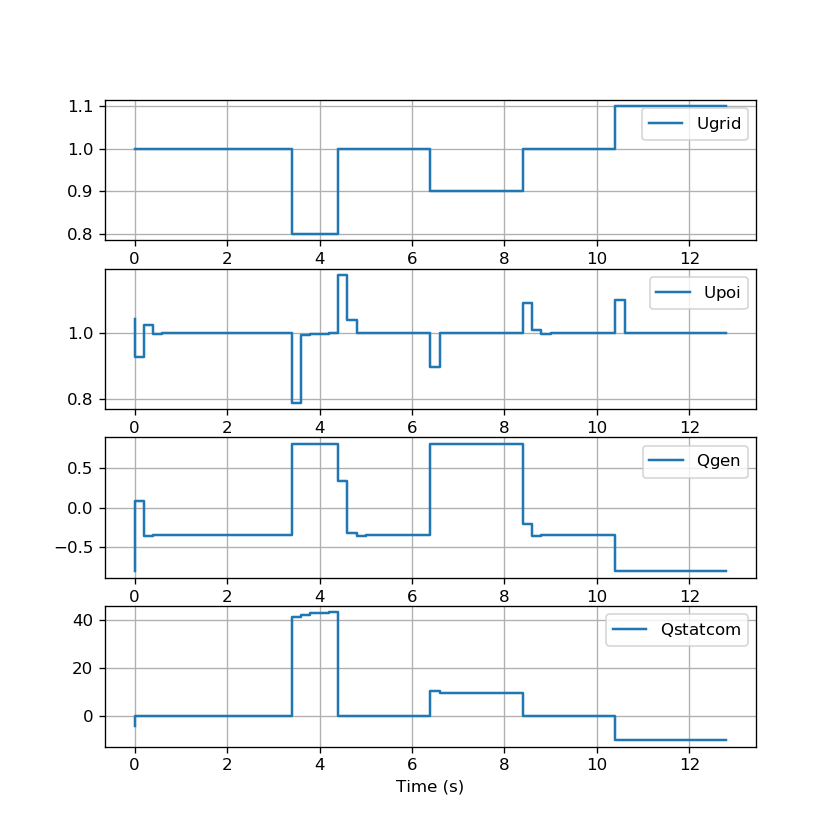

In [41]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(7, 7))
axes[0].step(Times,U_grid_per,label='$\sf Ugrid$')
axes[1].step(Times,U,label='$\sf Upoi$')
axes[2].step(Times,Q,label='$\sf Qgen$')
axes[3].step(Times,Q_st,label='$\sf Qstatcom$')

for ax in axes:
    ax.grid()
    ax.legend()
ax.set_xlabel('Time (s)')

axes[1].legend(loc='best')   

# PPC individual con medida en BT

### Este primer código representa un funcionamiento idealizado sin problemas de la potencia máxima admisible por el inversor. Es simplemente porque las graficas que salen son bastante ilustrativas del comportamiento del controlador que, más tarde, cuando se limite la variación de la gráfica resultará menos intuitiva

In [16]:
Dt = 0.2
Times = np.arange(0,3.0,Dt)
U_ref = 66.0e3
xi = -0.005028634770740998

pv_grid = grid()
pv_grid.read(data)
pv_grid.pf() 

K_p_poi = 0.3    #0.3
K_i_poi = 9.0   #11

K_p_g = 0.5     #2
K_i_g = 100.0    #200  con 120 tiraba el 0.75
 
qstat_acum=0
qstat_acum_pu=0


S_base = 1e6
U_base = 66e3
U_ref_pu = 1.0

U_poi = []
U_gen = []
Q_statcom = []
DU = []
Q = []
u_ref_pu = 1.0
U_grid_per = []
greed_feeders_buses = [item['bus'] for item in grid_obj.grid_feeders][:-1]

for grid_feeder in pv_grid.grid_feeders[:-1]:
    grid_feeder['epsilon'] = 0.0
    grid_feeder['xi_v'] = 0.0
    grid_feeder['U'] = []
    grid_feeder['T'] = []
    grid_feeder['Q'] = []
    
for t in Times:
    
    if t >1.0:
        U_ref_pu = 1.00
    if t >3.0:
        U_ref_pu = 1.00
    
    U_grid_pu = 1.0
    if t >1.0:
        U_grid_pu = 1.0
    if t >4.0:
        U_grid_pu = 1
    if t >8.0:
        U_grid_pu = 1
    if t >12.0:
        U_grid_pu = 0.95
    if t >16.0:
        U_grid_pu = 1
#    if t >15.0:
#        U_grid_pu = 0.75
#    if t >18.0:
#        U_grid_pu = 1

    U_grid_per += [U_grid_pu]
        
    set_voltage(pv_grid,'GRID',U_grid_pu*U_base,0.0)
    
    pv_grid.pf()
    mon = pv_grid.monitor(bus_from='POIhv',bus_to='GRID')
    mon.P
    U_meas_pu = mon.U/U_base
    
    if U_grid_pu < 0.75:
        K_p_poi = 0.3
        K_i_poi = 9.0
        K_p_g = 0.5
        K_i_g = 100
    elif U_grid_pu >=0.75 and U_grid_pu < 0.8 :
        K_p_poi = 0.3
        K_i_poi = 9.0
        K_p_g = 0.5
        K_i_g = 100
    elif U_grid_pu >=0.8 and U_grid_pu < 0.85 :
        K_p_poi = 0.3
        K_i_poi = 9.0
        K_p_g = 0.5
        K_i_g = 100
    elif U_grid_pu >=0.85 and U_grid_pu < 0.9 :
        K_p_poi = 0.3
        K_i_poi = 10.0
        K_p_g = 2
        K_i_g = 80  
    elif U_grid_pu >=0.9 and U_grid_pu < 0.95 :
        K_p_poi = 0.3
        K_i_poi = 11.0
        K_p_g = 2
        K_i_g = 80
    elif U_grid_pu >=0.95 :
        K_p_poi = 0.3
        K_i_poi = 11.0
        K_p_g = 2
        K_i_g = 80
    
    epsilon = U_ref_pu - U_meas_pu
    xi = xi + Dt*epsilon
    Du = K_p_poi*epsilon + K_i_poi*xi 
    
    
    for it in range(20):
        pv_grid.pf()
        for grid_feeder in pv_grid.grid_feeders[:-1]: 
            grid_feeder_bus = grid_feeder['bus']
            u_meas_pu = get_voltage(pv_grid,grid_feeder_bus)/400.0
            grid_feeder['epsilon'] = u_ref_pu + Du - u_meas_pu
            grid_feeder['xi_v'] += Dt/20*grid_feeder['epsilon']
            qgen_pu = K_p_g*grid_feeder['epsilon'] + K_i_g*grid_feeder['xi_v'] 
                       
       #     if np.absolute(qgen_pu) > 0.81 :                              #este if es para que cada exceso o defecto de
       #         if qgen_pu > 0 :                                          #reactiva se vaya almacenando en el valor 
       #             qstat_acum_pu=qstat_acum_pu+(qgen_pu-0.81)            #qstat_acum_pu para que lo necesario lo de el STATCOM
       #             qgen_pu=0.81 
       #         elif qgen_pu < 0 :
       #             qstat_acum_pu=qstat_acum_pu+(qgen_pu+0.81)
       #             qgen_pu=-0.81            

            qgen = qgen_pu*S_base            
            set_power(pv_grid,grid_feeder_bus, 1.0e6+1j*qgen)
            grid_feeder['U'] += [u_meas_pu]
            grid_feeder['T'] += [t+Dt/20*it]
            grid_feeder['Q'] += [qgen_pu]
        mon = pv_grid.monitor(bus_from='POIhv',bus_to='GRID')
        U_poi += [mon.U/U_base]
        qstat_acum=qstat_acum_pu*S_base
        set_power(pv_grid,'POImv', 0+1j*qstat_acum)
        Q_statcom += [qstat_acum_pu]
        qstat_acum_pu=0
    DU += [Du]
    Q += [mon.Q]


<IPython.core.display.Javascript object>


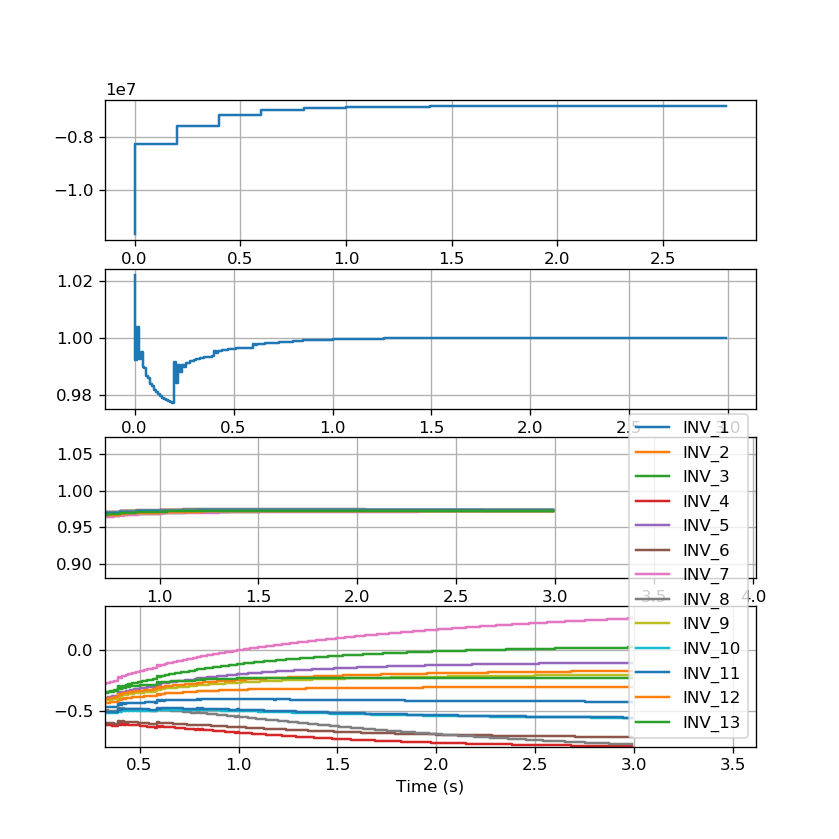

C:\Users\ivanf\anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Unrecognized location 'down left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  from ipykernel import kernelapp as app


In [21]:
plt.close('all')
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(7, 7))
axes[0].step(Times,Q,label='$\sf Q$')
axes[1].step(grid_feeder['T'],U_poi,label='$\sf Upoi$')

for grid_feeder in pv_grid.grid_feeders[:-1]:
    axes[2].step(grid_feeder['T'],grid_feeder['U'],label=f'{grid_feeder["bus"]}')
    axes[3].step(grid_feeder['T'],grid_feeder['Q'],label=f'{grid_feeder["bus"]}')
    
for ax in axes:
    ax.grid()
   # ax.legend()
ax.set_xlabel('Time (s)')

axes[3].legend(loc='best')

<IPython.core.display.Javascript object>


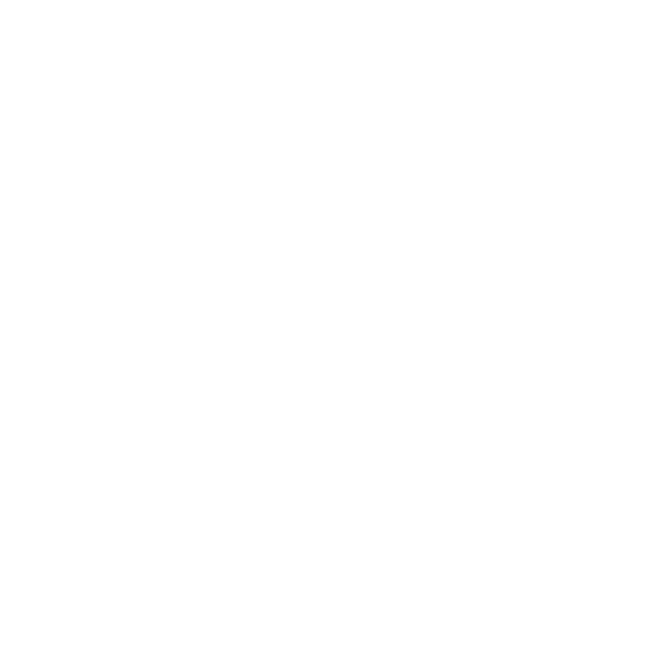

Text(0.5, 0, 'Time (s)')

In [12]:
plt.close('all')
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

for grid_feeder in pv_grid.grid_feeders[:-1]:
    axes[0].step(grid_feeder['T'],grid_feeder['U'],label=f'{grid_feeder["bus"]}')
    axes[1].step(grid_feeder['T'],grid_feeder['Q'],label=f'{grid_feeder["bus"]}')
    
for ax in axes:
    ax.grid()
    ax.legend()
ax.set_xlabel('Time (s)')

#axes[1].legend(loc='upper left')

### En este código ya se introduce el STATCOM y se limita la potencia reactiva

In [13]:
Dt = 0.2
Times = np.arange(0,3.0,Dt)
U_ref = 66.0e3
xi = -0.005028634770740998

pv_grid = grid()
pv_grid.read(data)
pv_grid.pf() 

K_p_poi = 0.3    #0.3
K_i_poi = 9.0   #11

K_p_g = 0.5     #2
K_i_g = 100.0    #200  con 120 tiraba el 0.75
 
qstat_acum=0
qstat_acum_pu=0


S_base = 1e6
U_base = 66e3
U_ref_pu = 1.0

U_poi = []
U_gen = []
Q_statcom = []
DU = []
Q = []
u_ref_pu = 1.0
U_grid_per = []
greed_feeders_buses = [item['bus'] for item in grid_obj.grid_feeders][:-1]

for grid_feeder in pv_grid.grid_feeders[:-1]:
    grid_feeder['epsilon'] = 0.0
    grid_feeder['xi_v'] = 0.0
    grid_feeder['U'] = []
    grid_feeder['T'] = []
    grid_feeder['Q'] = []
    
for t in Times:
    
    if t >1.0:
        U_ref_pu = 1.00
    if t >3.0:
        U_ref_pu = 1.00
    
    U_grid_pu = 1.0
    if t >1.0:
        U_grid_pu = 1.0
    if t >4.0:
        U_grid_pu = 1
    if t >8.0:
        U_grid_pu = 1
    if t >12.0:
        U_grid_pu = 0.95
    if t >16.0:
        U_grid_pu = 1
#    if t >15.0:
#        U_grid_pu = 0.75
#    if t >18.0:
#        U_grid_pu = 1

    U_grid_per += [U_grid_pu]
        
    set_voltage(pv_grid,'GRID',U_grid_pu*U_base,0.0)
    
    pv_grid.pf()
    mon = pv_grid.monitor(bus_from='POIhv',bus_to='GRID')
    mon.P
    U_meas_pu = mon.U/U_base
    
    if U_grid_pu < 0.75:
        K_p_poi = 0.3
        K_i_poi = 9.0
        K_p_g = 0.5
        K_i_g = 100
    elif U_grid_pu >=0.75 and U_grid_pu < 0.8 :
        K_p_poi = 0.3
        K_i_poi = 9.0
        K_p_g = 0.5
        K_i_g = 100
    elif U_grid_pu >=0.8 and U_grid_pu < 0.85 :
        K_p_poi = 0.3
        K_i_poi = 9.0
        K_p_g = 0.5
        K_i_g = 100
    elif U_grid_pu >=0.85 and U_grid_pu < 0.9 :
        K_p_poi = 0.3
        K_i_poi = 10.0
        K_p_g = 2
        K_i_g = 80  
    elif U_grid_pu >=0.9 and U_grid_pu < 0.95 :
        K_p_poi = 0.3
        K_i_poi = 11.0
        K_p_g = 2
        K_i_g = 80
    elif U_grid_pu >=0.95 :
        K_p_poi = 0.3
        K_i_poi = 11.0
        K_p_g = 2
        K_i_g = 80
    
    epsilon = U_ref_pu - U_meas_pu
    xi = xi + Dt*epsilon
    Du = K_p_poi*epsilon + K_i_poi*xi 
    
    
    for it in range(20):
        pv_grid.pf()
        for grid_feeder in pv_grid.grid_feeders[:-1]: 
            grid_feeder_bus = grid_feeder['bus']
            u_meas_pu = get_voltage(pv_grid,grid_feeder_bus)/400.0
            grid_feeder['epsilon'] = u_ref_pu + Du - u_meas_pu
            grid_feeder['xi_v'] += Dt/20*grid_feeder['epsilon']
            qgen_pu = K_p_g*grid_feeder['epsilon'] + K_i_g*grid_feeder['xi_v'] 
                       
            if np.absolute(qgen_pu) > 0.81 :                              #este if es para que cada exceso o defecto de
                if qgen_pu > 0 :                                          #reactiva se vaya almacenando en el valor 
                    qstat_acum_pu=qstat_acum_pu+(qgen_pu-0.81)            #qstat_acum_pu para que lo necesario lo de el STATCOM
                    qgen_pu=0.81 
                elif qgen_pu < 0 :
                    qstat_acum_pu=qstat_acum_pu+(qgen_pu+0.81)
                    qgen_pu=-0.81            

            qgen = qgen_pu*S_base            
            set_power(pv_grid,grid_feeder_bus, 1.0e6+1j*qgen)
            grid_feeder['U'] += [u_meas_pu]
            grid_feeder['T'] += [t+Dt/20*it]
            grid_feeder['Q'] += [qgen_pu]
        mon = pv_grid.monitor(bus_from='POIhv',bus_to='GRID')
        U_poi += [mon.U/U_base]
        qstat_acum=qstat_acum_pu*S_base
        set_power(pv_grid,'POImv', 0+1j*qstat_acum)
        Q_statcom += [qstat_acum_pu]
        qstat_acum_pu=0
    DU += [Du]
    Q += [mon.Q]


<IPython.core.display.Javascript object>


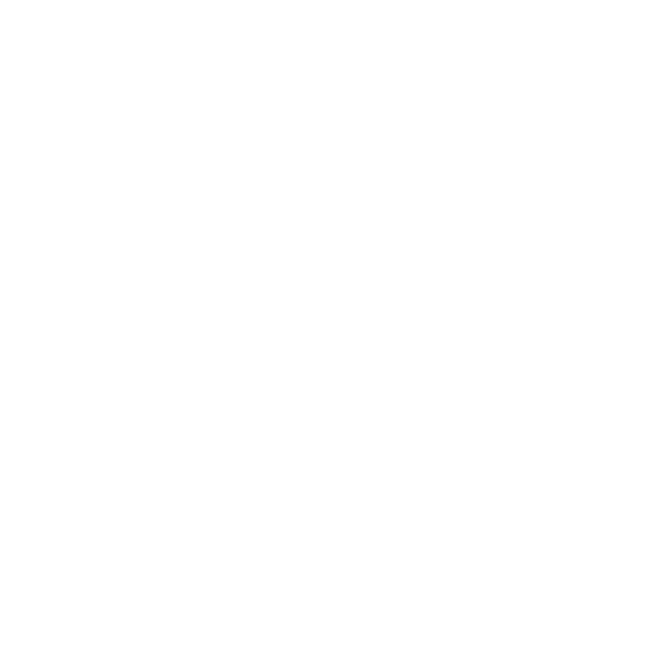

In [14]:
plt.close('all')
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(7, 7))
axes[0].step(Times,U_grid_per,label='$\sf Ugrid$')
axes[1].step(Times,Q,label='$\sf Qgen$')
axes[2].step(grid_feeder['T'],U_poi,label='$\sf Upoi$')
axes[3].step(grid_feeder['T'],Q_statcom,label='$\sf Ustatcom$')

for grid_feeder in pv_grid.grid_feeders[:-1]:
    axes[4].step(grid_feeder['T'],grid_feeder['U'],label=f'{grid_feeder["bus"]}')
    axes[5].step(grid_feeder['T'],grid_feeder['Q'],label=f'{grid_feeder["bus"]}')
    
for ax in axes:
    ax.grid()
#    ax.legend()
ax.set_xlabel('Time (s)')

axes[1].legend(loc='best')

<IPython.core.display.Javascript object>


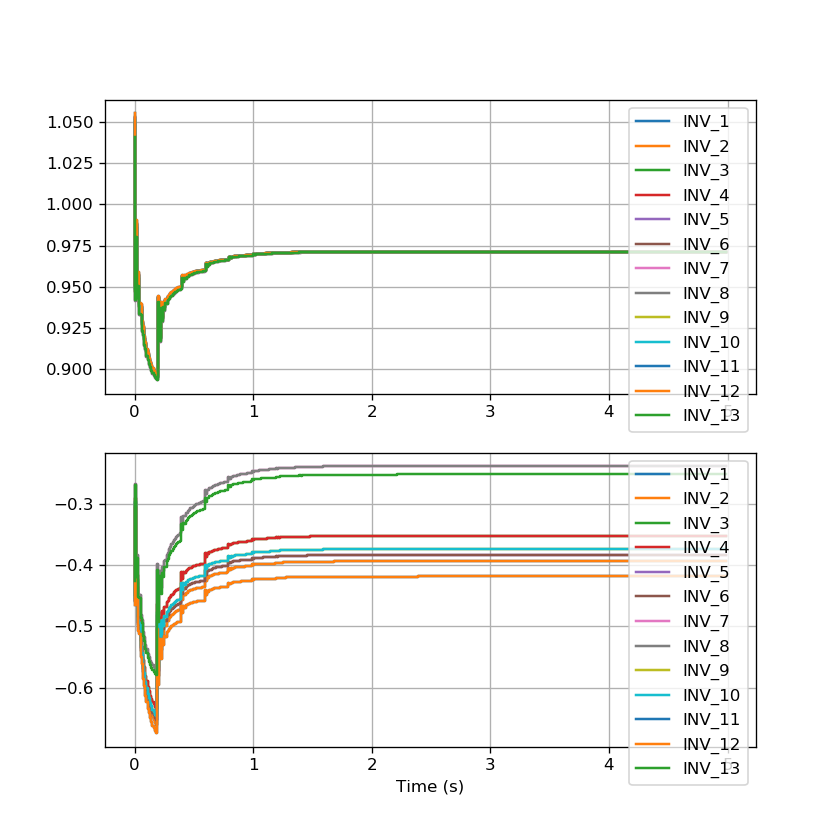

Text(0.5, 0, 'Time (s)')

In [296]:
plt.close('all')
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

for grid_feeder in pv_grid.grid_feeders[:-1]:
    axes[0].step(grid_feeder['T'],grid_feeder['U'],label=f'{grid_feeder["bus"]}')
    axes[1].step(grid_feeder['T'],grid_feeder['Q'],label=f'{grid_feeder["bus"]}')
    
for ax in axes:
    ax.grid()
    ax.legend()
ax.set_xlabel('Time (s)')

#axes[1].legend(loc='upper left')

<IPython.core.display.Javascript object>


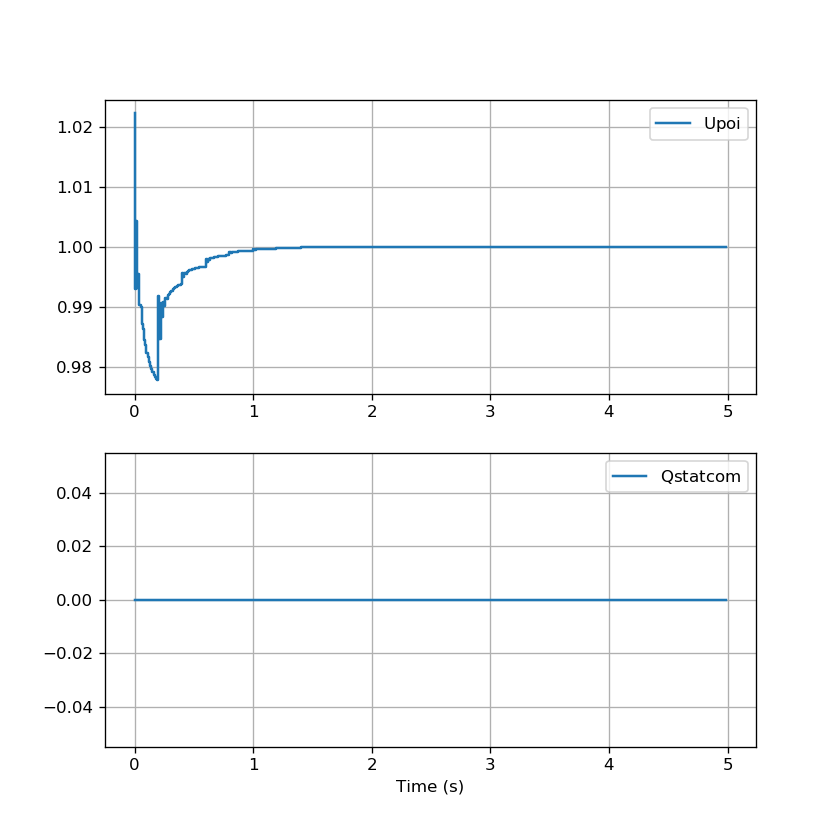

Text(0.5, 0, 'Time (s)')

In [295]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))
axes[0].step(grid_feeder['T'],U_poi,label='$\sf Upoi$')
axes[1].step(grid_feeder['T'],Q_statcom,label='$\sf Qstatcom$')

for ax in axes:
    ax.grid()
    ax.legend()
ax.set_xlabel('Time (s)')

# PPC individual con medida en BT (sin acoplamiento)

### Este primer código representa un funcionamiento idealizado sin problemas de la potencia máxima admisible por el inversor. Es simplemente porque las graficas que salen son bastante ilustrativas del comportamiento del controlador que, más tarde, cuando se limite la variación de la gráfica resultará menos intuitiva. Se ha añadido una variable que va a alternando para evitar el acoplamiento de los generadores.

In [18]:
Dt = 0.2
Times = np.arange(0,5.0,Dt)
U_ref = 66.0e3
xi = -0.005028634770740998

pv_grid = grid()
pv_grid.read(data)
pv_grid.pf() 

K_p_poi = 0.3    #0.3
K_i_poi = 9.0   #11

K_p_g = 0.5     #2
K_i_g = 100.0    #200  con 120 tiraba el 0.75
 
qstat_acum=0
qstat_acum_pu=0

acople=0

S_base = 1e6
U_base = 66e3
U_ref_pu = 1.0

U_poi = []
U_gen = []
Q_statcom = []
DU = []
Q = []
u_ref_pu = 1.0
U_grid_per = []
greed_feeders_buses = [item['bus'] for item in grid_obj.grid_feeders][:-1]

for grid_feeder in pv_grid.grid_feeders[:-1]:
    grid_feeder['epsilon'] = 0.0
    grid_feeder['xi_v'] = 0.0
    grid_feeder['U'] = []
    grid_feeder['T'] = []
    grid_feeder['Q'] = []
    
for t in Times:
    
    if t >1.0:
        U_ref_pu = 1.00
    if t >3.0:
        U_ref_pu = 1.00
    
    U_grid_pu = 1.0
    if t >1.0:
        U_grid_pu = 1.0
    if t >2.0:                     #4
        U_grid_pu = 0.95
    if t >8.0:
        U_grid_pu = 1
    if t >12.0:
        U_grid_pu = 0.95
    if t >16.0:
        U_grid_pu = 1
    if t >18.0:
        U_grid_pu = 1

    U_grid_per += [U_grid_pu]
        
    set_voltage(pv_grid,'GRID',U_grid_pu*U_base,0.0)
    
    pv_grid.pf()
    mon = pv_grid.monitor(bus_from='POIhv',bus_to='GRID')
    mon.P
    U_meas_pu = mon.U/U_base
    
    if U_grid_pu < 0.75:
        K_p_poi = 0.3
        K_i_poi = 9.0
        K_p_g = 0.5
        K_i_g = 100
    elif U_grid_pu >=0.75 and U_grid_pu < 0.8 :
        K_p_poi = 1
        K_i_poi = 7.5
        K_p_g = 0.1
        K_i_g = 120
    elif U_grid_pu >=0.8 and U_grid_pu < 0.85 :
        K_p_poi = 0.8
        K_i_poi = 8
        K_p_g = 0.1
        K_i_g = 120
    elif U_grid_pu >=0.85 and U_grid_pu < 0.9 :
        K_p_poi = 0.3
        K_i_poi = 10.0
        K_p_g = 2
        K_i_g = 80  
    elif U_grid_pu >=0.9 and U_grid_pu < 0.95 :
        K_p_poi = 0.3
        K_i_poi = 11.0
        K_p_g = 2
        K_i_g = 80
    elif U_grid_pu >=0.95 and U_grid_pu <= 1.05 :
        K_p_poi = 0.3
        K_i_poi = 11.0
        K_p_g = 2
        K_i_g = 80
    elif U_grid_pu > 1.05 and U_grid_pu <= 1.1 :
        K_p_poi = 0.3
        K_i_poi = 10.0
        K_p_g = 2
        K_i_g = 80
    
    epsilon = U_ref_pu - U_meas_pu
    xi = xi + Dt*epsilon
    Du = K_p_poi*epsilon + K_i_poi*xi 
    
    
    for it in range(20):
        pv_grid.pf()
        for grid_feeder in pv_grid.grid_feeders[:-1]: 
            grid_feeder_bus = grid_feeder['bus']
            #acople=0
            if acople == 0:
                u_meas_pu = get_voltage(pv_grid,grid_feeder_bus)/400.0
                grid_feeder['epsilon'] = u_ref_pu + Du - u_meas_pu
                grid_feeder['xi_v'] += Dt/20*grid_feeder['epsilon']
                qgen_pu = K_p_g*grid_feeder['epsilon'] + K_i_g*grid_feeder['xi_v'] 

            #    if np.absolute(qgen_pu) > 0.81 :                              #este if es para que cada exceso o defecto de
            #        if qgen_pu > 0 :                                          #reactiva se vaya almacenando en el valor 
            #            qstat_acum_pu=qstat_acum_pu+(qgen_pu-0.81)            #qstat_acum_pu para que lo necesario lo de el STATCOM
            #            qgen_pu=0.81 
            #        elif qgen_pu < 0 :
            #            qstat_acum_pu=qstat_acum_pu+(qgen_pu+0.81)
            #            qgen_pu=-0.81            

                qgen = qgen_pu*S_base            
                set_power(pv_grid,grid_feeder_bus, 1.0e6+1j*qgen)
                grid_feeder['U'] += [u_meas_pu]
                grid_feeder['T'] += [t+Dt/20*it]
                grid_feeder['Q'] += [qgen_pu]
            elif acople ==1:
                qgen = qgen_pu*S_base            
                set_power(pv_grid,grid_feeder_bus, 1.0e6+1j*qgen)
                grid_feeder['U'] += [u_meas_pu]
                grid_feeder['T'] += [t+Dt/20*it]
                grid_feeder['Q'] += [qgen_pu]
            if acople == 0:
                acople=1
            elif acople ==1 :
                acople=0
            if grid_feeder_bus == 'INV_13':
                acople=0
        mon = pv_grid.monitor(bus_from='POIhv',bus_to='GRID')
        U_poi += [mon.U/U_base]
        qstat_acum=qstat_acum_pu*S_base
        set_power(pv_grid,'POImv', 0+1j*qstat_acum)
        Q_statcom += [qstat_acum_pu]
        qstat_acum_pu=0
    DU += [Du]
    Q += [mon.Q]

<IPython.core.display.Javascript object>


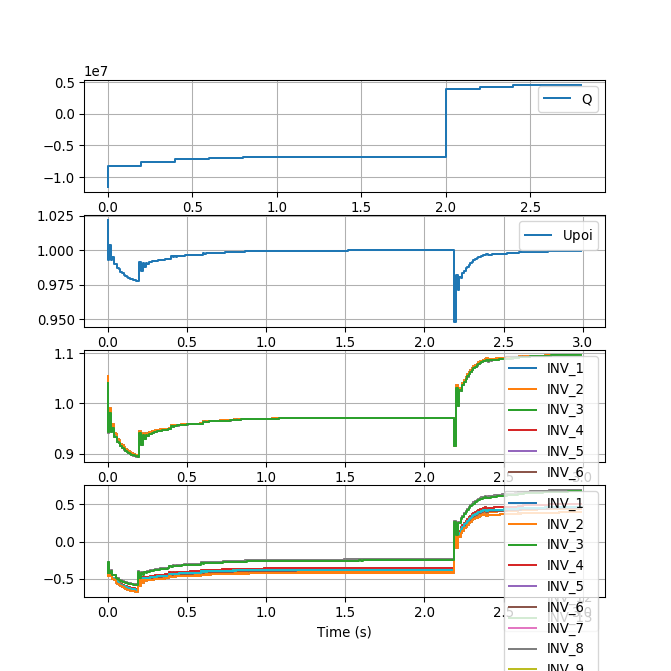

In [19]:
plt.close('all')
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(7, 7))
axes[0].step(Times,Q,label='$\sf Q$')
axes[1].step(grid_feeder['T'],U_poi,label='$\sf Upoi$')

for grid_feeder in pv_grid.grid_feeders[:-1]:
    axes[2].step(grid_feeder['T'],grid_feeder['U'],label=f'{grid_feeder["bus"]}')
    axes[3].step(grid_feeder['T'],grid_feeder['Q'],label=f'{grid_feeder["bus"]}')
    
for ax in axes:
    ax.grid()
    ax.legend()
ax.set_xlabel('Time (s)')

axes[1].legend(loc='best')

### En este código ya se introduce el STATCOM y se limita la potencia reactiva, mantiendo el sistema para evitar el acoplamiento

In [379]:
Dt = 0.2
Times = np.arange(0,6.0,Dt)
U_ref = 66.0e3
xi = -0.005028634770740998

pv_grid = grid()
pv_grid.read(data)
pv_grid.pf() 

K_p_poi = 0.3    #0.3
K_i_poi = 9.0   #11

K_p_g = 0.5     #2
K_i_g = 100.0    #200  con 120 tiraba el 0.75
 
qstat_acum=0
qstat_acum_pu=0


S_base = 1e6
U_base = 66e3
U_ref_pu = 1.0

U_poi = []
U_gen = []
Q_statcom = []
DU = []
Q = []
u_ref_pu = 1.0
U_grid_per = []
greed_feeders_buses = [item['bus'] for item in grid_obj.grid_feeders][:-1]

for grid_feeder in pv_grid.grid_feeders[:-1]:
    grid_feeder['epsilon'] = 0.0
    grid_feeder['xi_v'] = 0.0
    grid_feeder['U'] = []
    grid_feeder['T'] = []
    grid_feeder['Q'] = []
    
for t in Times:
    
    if t >1.0:
        U_ref_pu = 1.00
    if t >3.0:
        U_ref_pu = 1.00
    
    U_grid_pu = 1.0
    if t >1.0:
        U_grid_pu = 1.0
    if t >3.0:
        U_grid_pu = 0.76
#    if t >6.0:
#        U_grid_pu = 1.05
#    if t >9.0:
#        U_grid_pu = 0.85
#    if t >12.0:
#        U_grid_pu = 1
#    if t >15.0:
#        U_grid_pu = 0.8
#    if t >18.0:
#        U_grid_pu = 1
#    if t >20.0:
#        U_grid_pu = 1

    U_grid_per += [U_grid_pu]
        
    set_voltage(pv_grid,'GRID',U_grid_pu*U_base,0.0)
    
    pv_grid.pf()
    mon = pv_grid.monitor(bus_from='POIhv',bus_to='GRID')
    mon.P
    U_meas_pu = mon.U/U_base
    
    if U_grid_pu < 0.75:
        K_p_poi = 0.3
        K_i_poi = 9.0
        K_p_g = 0.5
        K_i_g = 100
    elif U_grid_pu >=0.75 and U_grid_pu < 0.8 :
        K_p_poi = 1
        K_i_poi = 7.5
        K_p_g = 0.5
        K_i_g = 120
    elif U_grid_pu >=0.8 and U_grid_pu < 0.85 :
        K_p_poi = 0.8
        K_i_poi = 8
        K_p_g = 0.1
        K_i_g = 120
    elif U_grid_pu >=0.85 and U_grid_pu < 0.9 :
        K_p_poi = 0.5
        K_i_poi = 10.0
        K_p_g = 0.5
        K_i_g = 110 
    elif U_grid_pu >=0.9 and U_grid_pu < 0.95 :
        K_p_poi = 0.5
        K_i_poi = 11.0
        K_p_g = 0.5
        K_i_g = 110
    elif U_grid_pu >=0.95 and U_grid_pu <= 1.05 :
        K_p_poi = 0.3
        K_i_poi = 11.0
        K_p_g = 2
        K_i_g = 80
    elif U_grid_pu > 1.05 and U_grid_pu <= 1.1 :
        K_p_poi = 0.3
        K_i_poi = 10.0
        K_p_g = 2
        K_i_g = 80
    elif U_grid_pu > 1.1 and U_grid_pu <= 1.15 :
        K_p_poi = 0.5
        K_i_poi = 9.0
        K_p_g = 0.5
        K_i_g = 50
    
    epsilon = U_ref_pu - U_meas_pu
    xi = xi + Dt*epsilon
    Du = K_p_poi*epsilon + K_i_poi*xi 
    
    
    for it in range(20):
        pv_grid.pf()
        for grid_feeder in pv_grid.grid_feeders[:-1]: 
            grid_feeder_bus = grid_feeder['bus']
            #acople=0
            if acople == 0:
                u_meas_pu = get_voltage(pv_grid,grid_feeder_bus)/400.0
                grid_feeder['epsilon'] = u_ref_pu + Du - u_meas_pu
                grid_feeder['xi_v'] += Dt/20*grid_feeder['epsilon']
                qgen_pu = K_p_g*grid_feeder['epsilon'] + K_i_g*grid_feeder['xi_v'] 

                if np.absolute(qgen_pu) > 0.81 :                              #este if es para que cada exceso o defecto de
                    if qgen_pu > 0 :                                          #reactiva se vaya almacenando en el valor 
                        qstat_acum_pu=qstat_acum_pu+(qgen_pu-0.81)            #qstat_acum_pu para que lo necesario lo de el STATCOM
                        qgen_pu=0.81 
                    elif qgen_pu < 0 :
                        qstat_acum_pu=qstat_acum_pu+(qgen_pu+0.81)
                        qgen_pu=-0.81            

                qgen = qgen_pu*S_base            
                set_power(pv_grid,grid_feeder_bus, 1.0e6+1j*qgen)
                grid_feeder['U'] += [u_meas_pu]
                grid_feeder['T'] += [t+Dt/20*it]
                grid_feeder['Q'] += [qgen_pu]
            elif acople ==1:
                qgen = qgen_pu*S_base            
                set_power(pv_grid,grid_feeder_bus, 1.0e6+1j*qgen)
                grid_feeder['U'] += [u_meas_pu]
                grid_feeder['T'] += [t+Dt/20*it]
                grid_feeder['Q'] += [qgen_pu]
            if acople == 0:
                acople=1
            elif acople ==1 :
                acople=0
            if grid_feeder_bus == 'INV_13':
                acople=0
        mon = pv_grid.monitor(bus_from='POIhv',bus_to='GRID')
        U_poi += [mon.U/U_base]
        qstat_acum=qstat_acum_pu*S_base
        set_power(pv_grid,'POImv', 0+1j*qstat_acum)
        Q_statcom += [qstat_acum_pu]
        qstat_acum_pu=0
    DU += [Du]
    Q += [mon.Q]


Maximum number of iterations reached: 23


<IPython.core.display.Javascript object>


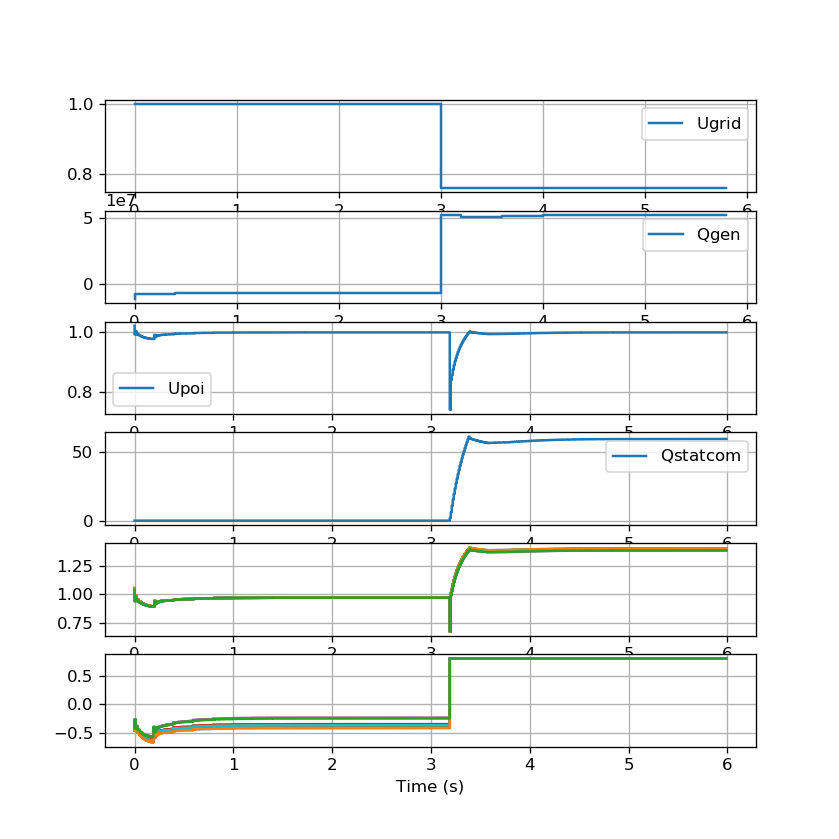

In [380]:
plt.close('all')
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(7, 7))
axes[0].step(Times,U_grid_per,label='$\sf Ugrid$')
axes[1].step(Times,Q,label='$\sf Qgen$')
axes[2].step(grid_feeder['T'],U_poi,label='$\sf Upoi$')
axes[3].step(grid_feeder['T'],Q_statcom,label='$\sf Qstatcom$')

for grid_feeder in pv_grid.grid_feeders[:-1]:
    axes[4].step(grid_feeder['T'],grid_feeder['U'],label=f'{grid_feeder["bus"]}')
    axes[5].step(grid_feeder['T'],grid_feeder['Q'],label=f'{grid_feeder["bus"]}')
    
for ax in axes:
    ax.grid()
#    ax.legend()
ax.set_xlabel('Time (s)')

axes[0].legend(loc='best')
axes[1].legend(loc='best')
axes[2].legend(loc='best')
axes[3].legend(loc='best')

<IPython.core.display.Javascript object>


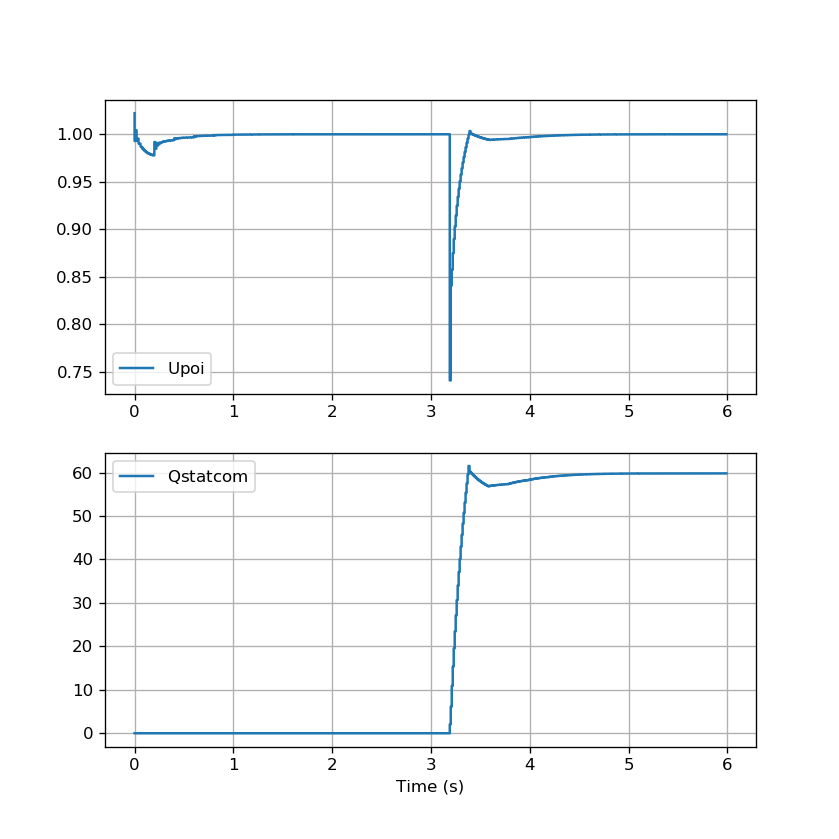

Text(0.5, 0, 'Time (s)')

In [381]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))
axes[0].step(grid_feeder['T'],U_poi,label='$\sf Upoi$')
axes[1].step(grid_feeder['T'],Q_statcom,label='$\sf Qstatcom$')

for ax in axes:
    ax.grid()
    ax.legend()
ax.set_xlabel('Time (s)')

<IPython.core.display.Javascript object>


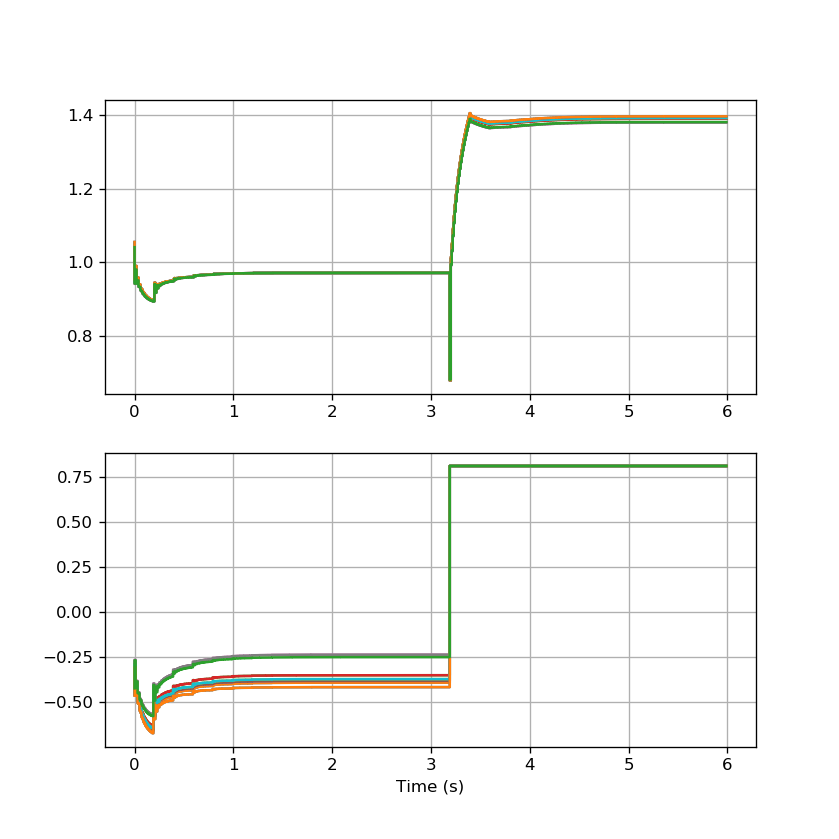

Text(0.5, 0, 'Time (s)')

In [382]:
plt.close('all')
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))

for grid_feeder in pv_grid.grid_feeders[:-1]:
    axes[0].step(grid_feeder['T'],grid_feeder['U'],label=f'{grid_feeder["bus"]}')
    axes[1].step(grid_feeder['T'],grid_feeder['Q'],label=f'{grid_feeder["bus"]}')
    
for ax in axes:
    ax.grid()
   # ax.legend()
ax.set_xlabel('Time (s)')

#axes[1].legend(loc='upper left')